In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("AMZN.csv")
# df = pd.read_csv("GOOGL.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6516.0,3.161163e+01,4.809534e+01,7.031300e-02,1.998875e+00,6.456750e+00,3.845137e+01,1.872000e+02
High,6516.0,3.199200e+01,4.865965e+01,7.239600e-02,2.028500e+00,6.535500e+00,3.868800e+01,1.886540e+02
Low,6516.0,3.119343e+01,4.746448e+01,6.562500e-02,1.964750e+00,6.353250e+00,3.820300e+01,1.848395e+02
Close,6516.0,3.159974e+01,4.806026e+01,6.979200e-02,2.001250e+00,6.444250e+00,3.846463e+01,1.865705e+02
Adj Close,6516.0,3.159974e+01,4.806026e+01,6.979200e-02,2.001250e+00,6.444250e+00,3.846463e+01,1.865705e+02
Volume,6516.0,1.425338e+08,1.401619e+08,9.744000e+06,6.888182e+07,1.059050e+08,1.607700e+08,2.086584e+09


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


In [201]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [202]:
df['Date'] = pd.to_datetime(df['Date'])


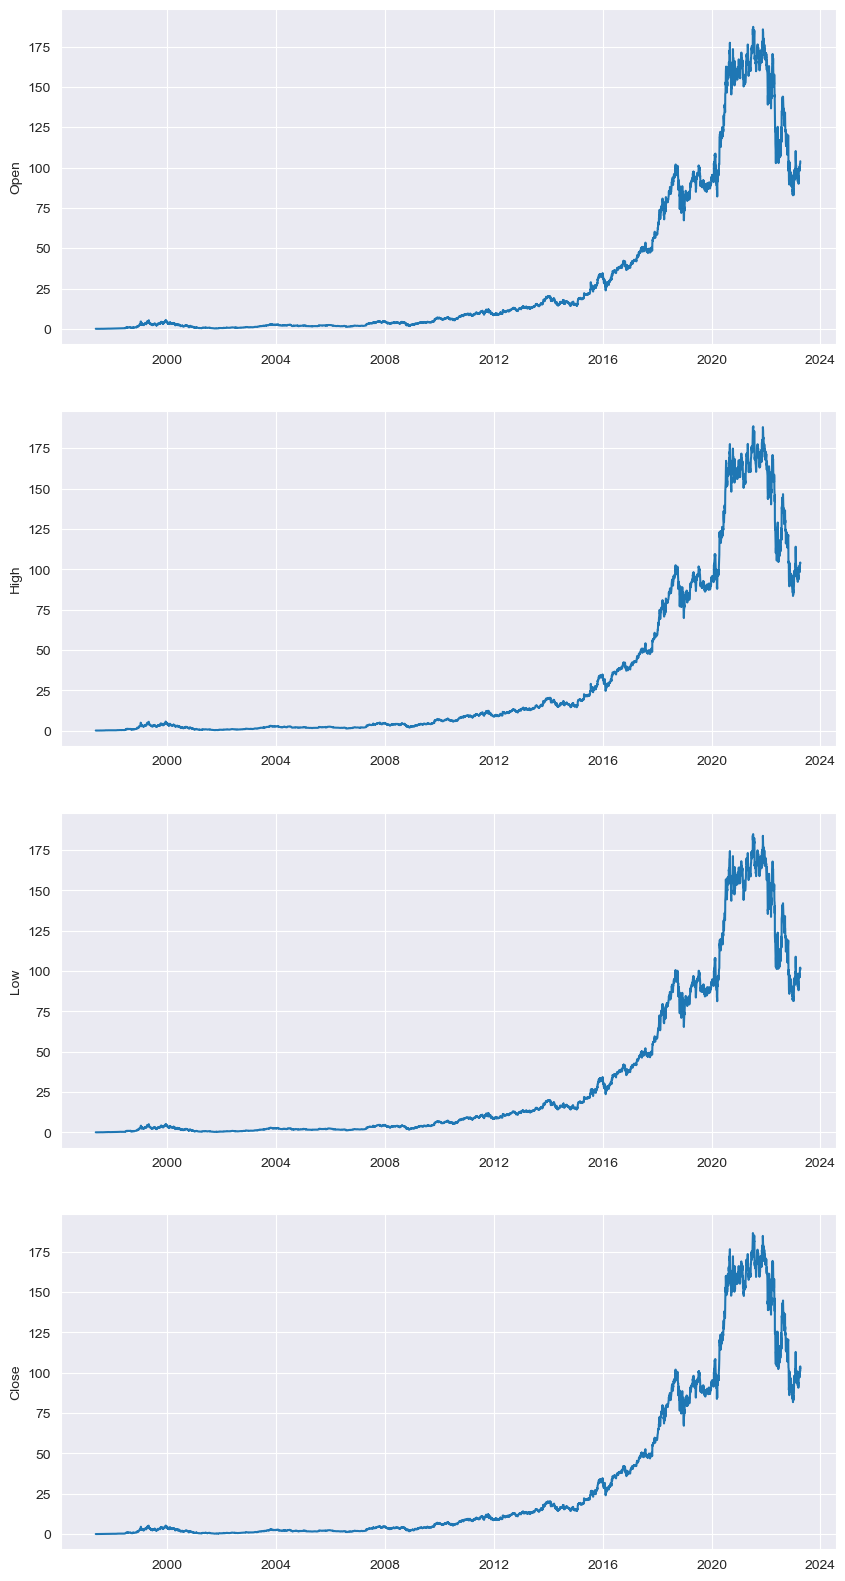

In [203]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(4, 1, figsize=(10, 20), sharey=True)
i=0

columns = ['Open', 'High', 'Low', 'Close']
for col in columns:
    axes[i].plot(df['Date'], df[col])
    axes[i].set_ylabel(col)
    i+=1


In [204]:
df_new = df[['Date', 'Close']]
df_new

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


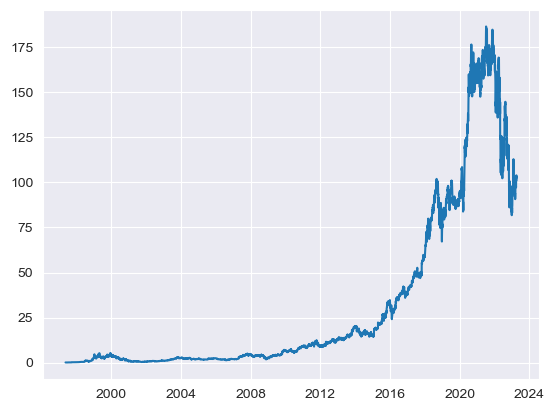

In [205]:
# df_new['Date'] = pd.to_datetime(df_new['Date'])

plt.plot(df_new['Date'], df_new['Close'])
plt.show()

In [206]:
df_new['Date']

0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6511   2023-03-30
6512   2023-03-31
6513   2023-04-03
6514   2023-04-04
6515   2023-04-05
Name: Date, Length: 6516, dtype: datetime64[ns]

In [207]:
from copy import deepcopy as dc

def prevDataset(dataframe, lookback):
    df = dataframe.copy()
    df.set_index('Date', inplace=True)
    for i in range(1, lookback+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    return df

lookback = 10

df_shifted = prevDataset(df_new, lookback)

df_shifted_np = df_shifted.to_numpy()

df_shifted

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-06-03,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-06-04,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-05,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999


In [208]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

df_shifted_np = scaler.fit_transform(df_shifted_np)

df_shifted_np

array([[-0.99995531, -0.99995253, -0.99993855, ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99994973, -0.99995531, -0.99995253, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99996649, -0.99994973, -0.99995531, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09307615, ...,  0.05769258,
         0.07817512,  0.04707602],
       [ 0.11398769,  0.09747299,  0.10690997, ...,  0.05779984,
         0.05769258,  0.07817512],
       [ 0.08342464,  0.11398769,  0.09747299, ...,  0.05158   ,
         0.05779984,  0.05769258]])

In [209]:
from copy import deepcopy as dc

df_shifted_np2 = dc(df_shifted_np)

In [210]:
x = df_shifted_np2[:,1:]
y = df_shifted_np2[:, 0]

In [211]:
x = dc(np.flip(x, axis=1))

In [212]:
lookback = 10
entries = x.shape[0]
train_size = np.round(0.9*entries).astype(np.int64)
test_size = entries - train_size

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

x_train = x_train.reshape((-1, lookback, 1))
x_test = x_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5855, 10, 1), (651, 10, 1), (5855, 1), (651, 1))

In [213]:
import torch

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [214]:
dataset_train = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
dataset_test = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor)

In [215]:
from torch.utils.data import DataLoader

batch_size=32

train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [216]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0], batch[1]
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 10, 1]) torch.Size([32, 1])


In [233]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 10, 2)
model


LSTM(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [234]:
num_epochs = 20

def trainModel():
    for epoch in range(num_epochs):
        model.train(True)
        print('Epoch no.', epoch+1)
        running_loss = 0.0

        for _, batch in enumerate(train_loader):
            x, y = batch[0], batch[1]

            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            running_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if _%100 == 99:
                avg_loss = running_loss/(100)
                print('Batch', _+1, ' Loss = ', avg_loss)

            running_loss = 0.0

    

In [245]:
from torchmetrics.regression import MeanAbsolutePercentageError

lR = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lR)
# loss_fn = nn.MSELoss()
loss_fn = MeanAbsolutePercentageError()

trainModel()

Epoch no. 1
Batch 100  Loss =  0.0014476001262664795
Epoch no. 2
Batch 100  Loss =  8.330144919455051e-05
Epoch no. 3
Batch 100  Loss =  0.002351120561361313
Epoch no. 4
Batch 100  Loss =  0.0006862019747495651
Epoch no. 5
Batch 100  Loss =  0.00031315147876739504
Epoch no. 6
Batch 100  Loss =  0.0002821134589612484
Epoch no. 7
Batch 100  Loss =  0.0003720143809914589
Epoch no. 8
Batch 100  Loss =  0.0004073363542556763
Epoch no. 9
Batch 100  Loss =  0.0006526060402393341
Epoch no. 10
Batch 100  Loss =  0.0008987763524055481
Epoch no. 11
Batch 100  Loss =  0.00017567925155162812
Epoch no. 12
Batch 100  Loss =  0.0003339213877916336
Epoch no. 13
Batch 100  Loss =  0.0003683864325284958
Epoch no. 14
Batch 100  Loss =  0.00019228188320994378
Epoch no. 15
Batch 100  Loss =  0.0001853821612894535
Epoch no. 16
Batch 100  Loss =  0.0038042014837265017
Epoch no. 17
Batch 100  Loss =  0.00026573654264211655
Epoch no. 18
Batch 100  Loss =  0.0003553987294435501
Epoch no. 19
Batch 100  Loss =  0.

In [246]:
def testModel():
    model.train(False)
    running_loss = 0.0
    
    for _, batch in enumerate(train_loader):
        x, y = batch[0], batch[1]
        with torch.no_grad():
            output = model(x)
            loss = loss_fn(output, y)
            running_loss += loss.item()
                                
    print('Loss = ', running_loss/len(test_loader))
        
                                

In [247]:
testModel()

Loss =  0.6101176453576911


In [248]:
test_predictions = model(x_test_tensor).detach().numpy().flatten()

dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([168.69611131, 168.73487921, 168.20244993, 166.87131836,
       165.97392604, 164.94328328, 163.65427672, 162.35836697,
       161.59202408, 160.59096165, 159.10276308, 157.30449905,
       155.75140939, 156.11448267, 155.77141308, 155.49441846,
       155.9431702 , 157.11889109, 158.03117918, 158.76188339,
       159.80311993, 160.13166059, 160.63621033, 160.41451347,
       160.70129039, 161.04787271, 161.87686121, 163.44377948,
       164.95387706, 165.83496185, 166.21391468, 166.11996572,
       165.51594781, 164.90646627, 164.19289219, 163.51225556,
       163.07424211, 162.75848514, 162.99273779, 162.72801551,
       162.57301613, 161.42246242, 159.81583692, 158.66941289,
       159.31710653, 160.79970252, 162.13409115, 162.25422998,
       161.14844139, 160.59447438, 160.13640723, 159.98611002,
       159.9453523 , 159.93919946, 159.6485263 , 159.39640984,
       159.10636474, 158.92434177, 158.96502167, 159.46963255,
       160.11840447, 160.49634572, 161.0459496 , 161.46

In [249]:
dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([168.399994, 164.731003, 157.492004, 163.430496, 158.755493,
       155.811005, 155.148499, 157.806503, 153.904999, 150.436493,
       147.745499, 148.023499, 156.449493, 149.992996, 150.989502,
       154.7565  , 158.702499, 157.244003, 157.436493, 161.063004,
       156.25    , 159.960007, 154.998001, 159.7845  , 159.527496,
       164.332504, 172.1465  , 172.181503, 168.185501, 166.932495,
       163.635498, 160.360504, 160.850494, 159.246994, 158.820007,
       160.220001, 160.352005, 164.316498, 158.139008, 160.550507,
       151.807495, 150.223999, 152.420502, 162.057999, 166.100006,
       165.568497, 157.186996, 151.751007, 156.869507, 155.514008,
       156.440506, 156.552994, 156.783005, 155.272995, 155.850998,
       154.970001, 154.919495, 155.903   , 159.253494, 159.766998,
       158.401993, 161.003998, 160.176498, 159.336502, 158.128998,
       157.899994, 158.864502, 155.210007, 155.074493, 155.820999,
       157.848495, 158.255997, 162.048004, 161.804001, 160.082

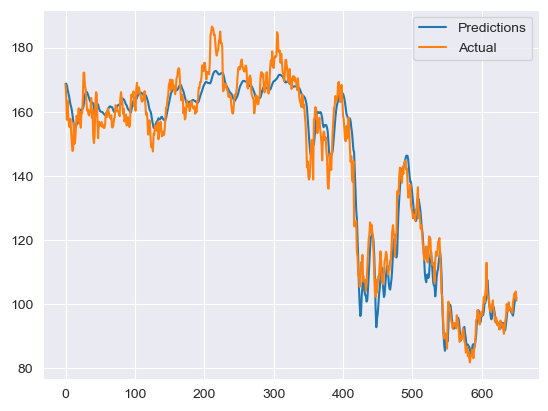

In [250]:
plt.plot(test_predictions)
plt.plot(new_y_test)
plt.legend(["Predictions", "Actual"])
plt.show()